In [27]:
import pandas as pd 
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv("/Volumes/T7 Touch/Research/Leighton Relationship/data/Hawthorne/Leighton_Relationship_HW.csv", index_col=0)
data.index = pd.to_datetime(data.index, errors='coerce')
print(data.head)

<bound method NDFrame.head of                            NO    NO2     O3    SR  Temp  SR_Synoptic    UV  \
datetime                                                                     
2023-04-28 09:00:00  2.200000   6.15  0.052  0.98  59.0        137.0  19.0   
2023-04-28 12:00:00  2.566667   7.85  0.059  1.32  66.0        686.0  18.0   
2023-04-28 13:00:00  1.433333   5.55  0.066  1.28  66.0        813.0  12.0   
2023-04-28 14:00:00  0.933333   4.60  0.070  1.17  68.0        893.0  23.0   
2023-04-28 15:00:00  0.800000   4.45  0.071  0.99  69.0        920.0  18.0   
...                       ...    ...    ...   ...   ...          ...   ...   
2025-10-08 17:00:00  0.366667  10.80  0.049  0.07  69.0        343.0   1.0   
2025-10-09 07:00:00  6.400000  17.70  0.017  0.17  62.0          0.0   3.0   
2025-10-09 08:00:00  5.833333  12.05  0.024  0.41  66.0          5.0   7.0   
2025-10-09 09:00:00  5.966667  12.90  0.023  0.37  69.0        122.0   8.0   
2025-10-09 10:00:00  4.333333  11.

In [35]:
# Filter data between 9:00 AM and 4:00 PM
daytimeData = data.between_time('09:00', '16:00')

# Calculate the mean (with the syntax fix from before)
print(f"Mean of the UV is {daytimeData['UV'].mean()} W/m^2 and the mean of the J value is {daytimeData['J'].mean()}")
print(f"The median UV is {daytimeData['UV'].median()} W/m^2 and the median of the J value is {daytimeData['J'].median()}")

Mean of the UV is 12.354940318302388 W/m^2 and the mean of the J value is 0.0009617085543766579
The median UV is 11.0 W/m^2 and the median of the J value is 0.00085624


In [23]:
print(f"Mean of the Temp in K is {daytimeData['Temp[K]'].mean()} and the make of K is {daytimeData['K'].mean()}")

Mean of the Temp in K is 290.7461538461538 and the make of K is 1.743648501866099e-14


In [24]:
import numpy as np
twonineeight = daytimeData[np.abs(daytimeData['Temp[K]'] - 298)<0.25]
print(twonineeight)
print(f"The mean of K at 298 K is {twonineeight['K'].mean()}")

                           NO   NO2     O3    SR  Temp  SR_Synoptic    UV  \
datetime                                                                    
2023-04-29 12:00:00  0.866667  4.15  0.066  1.32  77.0        684.0  19.0   
2023-05-02 13:00:00  0.633333  2.80  0.056  1.24  77.0        576.0  14.0   
2023-05-03 11:00:00  1.600000  4.90  0.052  1.19  77.0        446.0  25.0   
2023-05-16 10:00:00  2.833333  9.55  0.056  1.21  77.0        102.0  26.0   
2023-05-17 12:00:00  0.933333  3.10  0.061  1.02  77.0        665.0  16.0   
...                       ...   ...    ...   ...   ...          ...   ...   
2025-09-27 12:00:00  0.800000  5.15  0.061  1.00  77.0        597.0  20.0   
2025-09-29 13:00:00  0.100000  1.65  0.051  0.89  77.0        538.0  18.0   
2025-09-29 14:00:00  0.166667  2.30  0.050  0.51  77.0        721.0  12.0   
2025-09-29 15:00:00  0.300000  3.20  0.049  0.25  77.0        620.0   7.0   
2025-10-02 11:00:00  1.400000  3.45  0.050  0.78  77.0        462.0  18.0   

In [25]:
print(f"The mean for concentration of NO is {daytimeData['NO_mol_per_cm3'].mean():.4e}")
print(f"The mean for concentration of NO2 is {daytimeData['NO2_mol_per_cm3'].mean():.4e}")
print(f"The mean for concentration of O3 is {daytimeData['O3_mol_per_cm3'].mean():.4e}")


The mean for concentration of NO is 8.8210e+13
The mean for concentration of NO2 is 1.8708e+14
The mean for concentration of O3 is 1.0361e+12


In [26]:
print(f"The min for temp is {min(data["Temp"])} and the max is {max(data["Temp"])}")

The min for temp is 15.0 and the max is 104.0


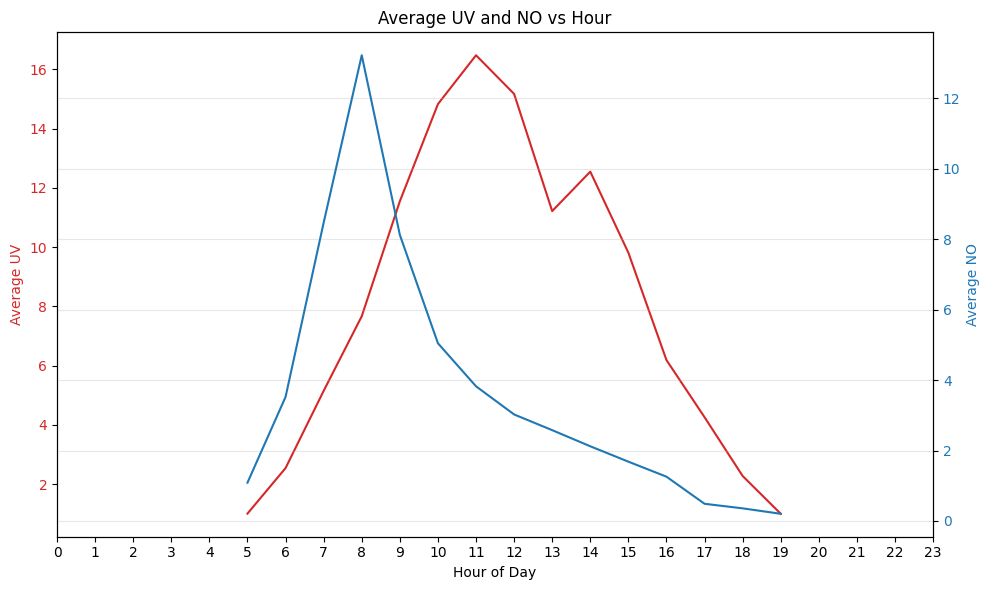

In [33]:
# Calculate averages by hour for the entire dataset
hourly_avg = data.groupby(data.index.hour).mean(numeric_only=True)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot UV on primary axis
color = 'tab:red'
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Average UV', color=color)
ax1.plot(hourly_avg.index, hourly_avg['UV'], color=color, label='UV')
ax1.tick_params(axis='y', labelcolor=color)

# Create secondary axis for NO
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average NO', color=color)
ax2.plot(hourly_avg.index, hourly_avg['NO'], color=color, label='NO')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average UV and NO vs Hour')
fig.tight_layout()
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.show()

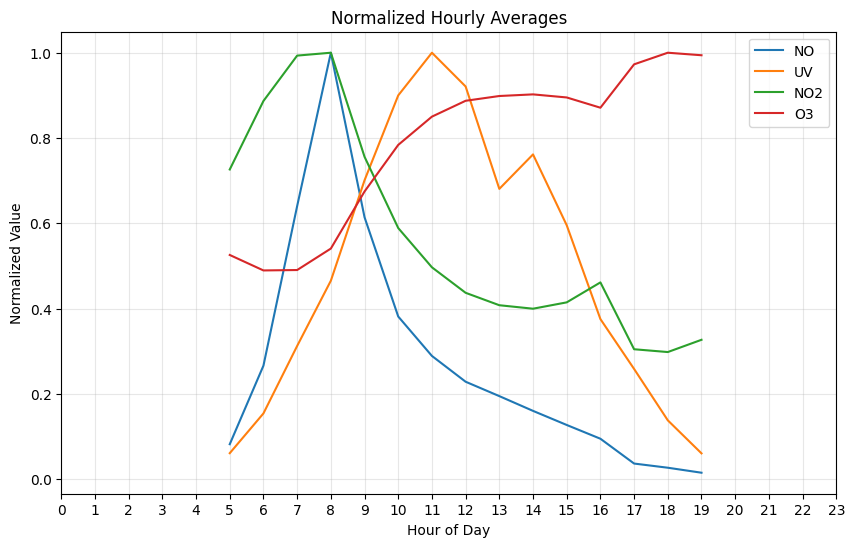

In [34]:
# Normalize the values by their max
norm_hourly = hourly_avg / hourly_avg.max()

plt.figure(figsize=(10, 6))
plt.plot(norm_hourly.index, norm_hourly['NO'], label="NO")
plt.plot(norm_hourly.index, norm_hourly["UV"], label="UV")
plt.plot(norm_hourly.index, norm_hourly["NO2"], label="NO2")
plt.plot(norm_hourly.index, norm_hourly["O3"], label="O3")

plt.xlabel('Hour of Day')
plt.ylabel('Normalized Value')
plt.title('Normalized Hourly Averages')
plt.legend()
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.show()